# numpy 라이브러리 이해

- 통계, 분석, AI 분야의 라이브러리 내부에 다양한 수치연산이 필요함
  + 수치연산을 얼마나 효율적으로 처리하는가에 따라 성능에 많은 영향을 줌
  + numpy 는 ndarray 라는 자료를 바탕으로 강력한 연산 기능을 제공함
- numpy 와 다른 python 패키지와의 관계
  ![nn](./images/numpy-01.png)

# ndarray 성능 확인

In [1]:
import numpy as np

In [2]:
a = [1, 2, 3]
b = [4, 5, 6]
c = []

for a, b in zip(a, b):
    c.append(a+b)
    
print(c)

[5, 7, 9]


In [3]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = a + b

print(c)

[5 7 9]


In [4]:
a = [[1,2,3,4] for _ in range(1000000)]
b = np.array(a)

def exchange_list(a):
    c = []
    for x in a:
        x[2], x[3], x[0], x[1] = x
        c.append(x)
    return c

def exchange_ndarray(a):
    return a[ : , [2, 3, 0, 1]]

In [5]:
print(a[:2], b[:2], sep='\n')

[[1, 2, 3, 4], [1, 2, 3, 4]]
[[1 2 3 4]
 [1 2 3 4]]


In [6]:
c = exchange_list(a)

In [7]:
d = exchange_ndarray(b)

In [8]:
print(c[:2], d[:2], sep='\n')

[[3, 4, 1, 2], [3, 4, 1, 2]]
[[3 4 1 2]
 [3 4 1 2]]


In [9]:
%timeit exchange_list(a)

127 ms ± 722 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit exchange_ndarray(b)

3.39 ms ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# ndarray 가 list 보다 빠른 이유

- numpy 의 ndarray와 built-in list 의 데이터 접근 방법 차이

![nn](./images/numpy-02.png)

https://github.com/numpy/numpy/blob/maintenance/1.7.x/numpy/core/include/numpy/ndarraytypes.h#L646
https://hg.python.org/cpython/file/3.6/Include/listobject.h#l23
https://hg.python.org/cpython/file/3.6/Include/longintrepr.h/#l85

# ndarray 의 속성

In [11]:
import numpy as np

In [12]:
def printinfo(a):
    data = ['a.ndim', 'a.shape', 'a.size', 'a.dtype', 'a.itemsize', 'a.strides', 'a.nbytes']
    for x in data:
        print('%-11s' % x, eval(x))

a = np.array([[0,1,2], [3,4,5]], dtype=np.int32)
printinfo(a)

a.ndim      2
a.shape     (2, 3)
a.size      6
a.dtype     int32
a.itemsize  4
a.strides   (12, 4)
a.nbytes    24


# ndarray 생성 - np.array()

In [13]:
import numpy as np

In [14]:
def printary(*a):
    for x in a:
        print(f'{type(x)}\n{x.dtype}\n{x}', end='\n\n')
    print("-" * 30)

In [15]:
a = np.array([1,2,3])
b = np.array([[1,2,3], [4,5,6]])
c = np.array([[1,2,3], [4,5]])
printary(a, b, c)

<class 'numpy.ndarray'>
int64
[1 2 3]

<class 'numpy.ndarray'>
int64
[[1 2 3]
 [4 5 6]]

<class 'numpy.ndarray'>
object
[list([1, 2, 3]) list([4, 5])]

------------------------------


/var/folders/3k/bgnrnfc15w792712mgb6g0_c0000gn/T/ipykernel_29323/3341886738.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array([[1,2,3], [4,5]])


# structured array - np.array()

- ndarray 가 모든 element를 동일 type 으로 하지 않고, column 별로 다른 type 을 사용하는 구조
- 하기 예시는 Big Endian, Little Endian 을 참조할 것
- 권장하지 않음

In [16]:
sdtype = [('name', '<U10'), ('height', '<i4'), ('weight', np.float32)]
value =  [('Tome', 178, 98.5), ('Jim', 183, 79.5), ('Adam', 175, 82.8)]

a = np.array(value, dtype=sdtype)

printary(a)

<class 'numpy.ndarray'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
[('Tome', 178, 98.5) ('Jim', 183, 79.5) ('Adam', 175, 82.8)]

------------------------------


In [17]:
printary(a['name'], a['height'], a['weight'])
printary(a[0], a[1], a[2])
print(a.shape, a.strides, a[0])

<class 'numpy.ndarray'>
<U10
['Tome' 'Jim' 'Adam']

<class 'numpy.ndarray'>
int32
[178 183 175]

<class 'numpy.ndarray'>
float32
[98.5 79.5 82.8]

------------------------------
<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Tome', 178, 98.5)

<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Jim', 183, 79.5)

<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Adam', 175, 82.8)

------------------------------
(3,) (48,) ('Tome', 178, 98.5)


# ndarray 생성 - np.arange()

In [18]:
a = np.arange(5)
b = np.arange(1, 10, 2)
c = np.arange(1, 2, 0.1)

printary(a, b, c)

<class 'numpy.ndarray'>
int64
[0 1 2 3 4]

<class 'numpy.ndarray'>
int64
[1 3 5 7 9]

<class 'numpy.ndarray'>
float64
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]

------------------------------


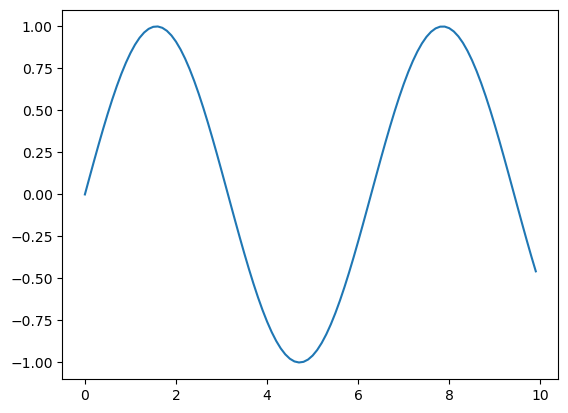

In [19]:
# 그래프를 그릴 때 축설정으로 사용 예
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.plot(x, y)

plt.show()

# ndarray 생성 - np.linspace()

- linear space 라고 읽는다!
- np.linspace(start: array_like, stop, num=50, endpoint=True, retstep=False, dtype=None)

In [20]:
x = np.array(1) # 1개만 있는 값도 (scalar) array-like 임
print(x, type(x))

1 <class 'numpy.ndarray'>


In [21]:
a = np.linspace(1, 5, 9) # 1부터 5까지 9개의 원소를 가는 array, 간격은 알아서 결정
b = np.linspace(1, 5, 10, endpoint=False)
c, step = np.linspace(1, 5, 9, retstep=True)  # c가 array, d 가 step

print(a, b, c, step, sep='\n')

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
0.5


In [22]:
x = np.linspace([1,2,3], [2,4,6], num=5)
print(x)

[[1.   2.   3.  ]
 [1.25 2.5  3.75]
 [1.5  3.   4.5 ]
 [1.75 3.5  5.25]
 [2.   4.   6.  ]]


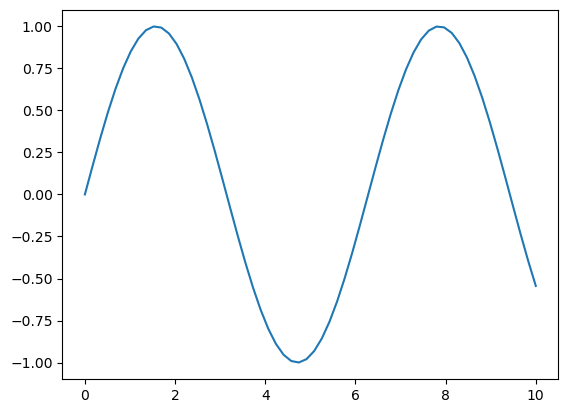

In [23]:
x = np.linspace(0, 10, 60)
y = np.sin(x)

plt.plot(x, y)
plt.show()

# random 사용

- `np.random.rand(d0, d1, ... dn)`
    + 0 ~ 1 사이의 균등 분포로 실수 난수 배열 생성
    + d0, d1, ... dn : 배열의 shape 의 의미하는 정수
- `np.random.randint(e, size=n)`, `np.random.randint(s, e, size=n)`
    + 0 ~ $e-1$, s ~ $e-1$ 범위의 값을 갖는 균등 분포의 정수 난수 생성
    + size: 정수(1차원), tuple(1차원 이상)로 shape 을 지정
- `np.random.randn(d0, d1, ... dn)`
    + 평균 0, 표준편차 1을 갖는 가우시안 정규분포로 난수 배열 생성 (음수 포함)
- `np.random.normal(평균, 표준편차, size)`
    + 생략하면 평균 = 0, 표준편차 = 1, size = 1
- `np.random.permutation(e)` : 0 ~ e-1 값을 갖는 정수의 무작위 순서 1차원 배열 생성
- `np.random.permutation(c)` : c 요소들에 대해 무작위 순서로 변경된 1차원 배열 생성
    + e: 정수, c : array_like 객체

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
np.set_printoptions(threshold=999, 
                    suppress=True, 
                    precision=4, 
                    edgeitems=3)

In [26]:
def printary(*a):
    for x in a:
        print(f"shape: {x.shape}")
        print(f"array: %s{x}" % ('' if x.ndim == 1 else '\n'))
        print("mean : %.3f, std: %.3f" % (x.mean(), x.std()))
        print("-" * 30)

In [27]:
def showHist(x):
    plt.hist(x)
    plt.show()

In [28]:
a = np.random.rand(5)
b = np.random.rand(2, 2, 3)

printary(a, b)

shape: (5,)
array: [0.3124 0.2888 0.963  0.9328 0.9574]
mean : 0.691, std: 0.319
------------------------------
shape: (2, 2, 3)
array: 
[[[0.9428 0.3065 0.1289]
  [0.1299 0.7584 0.7808]]

 [[0.1233 0.5198 0.9601]
  [0.2874 0.329  0.1764]]]
mean : 0.454, std: 0.311
------------------------------


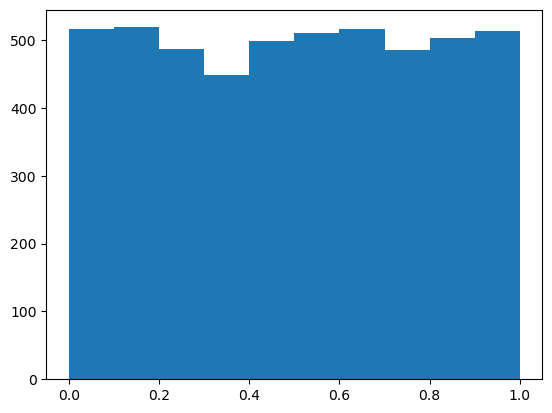

In [29]:
showHist(np.random.rand(5000))

In [30]:
a = np.random.randint(10, size=(5,))
b = np.random.randint(50, 100, (2, 4))

printary(a, b)

shape: (5,)
array: [5 3 8 8 8]
mean : 6.400, std: 2.059
------------------------------
shape: (2, 4)
array: 
[[55 65 82 76]
 [92 55 85 72]]
mean : 72.750, std: 12.784
------------------------------


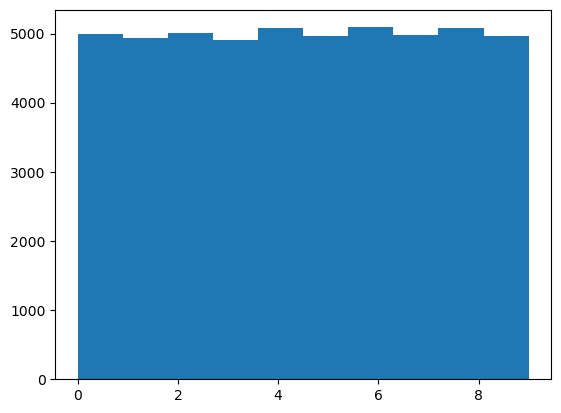

In [31]:
showHist(np.random.randint(10, size=50000))

In [32]:
a = np.random.randn(5)
b = np.random.randn(200, 50)

printary(a, b)

shape: (5,)
array: [ 0.2067 -0.7956 -0.4941  1.1236  1.0384]
mean : 0.216, std: 0.778
------------------------------
shape: (200, 50)
array: 
[[-0.0156 -1.0521  0.7094 ... -1.2991 -0.581   0.5558]
 [ 0.3515 -0.8398  0.5797 ... -0.9419 -0.9707 -0.7775]
 [-0.6229 -0.5956  2.2028 ... -0.6118 -0.4064 -0.5561]
 ...
 [-0.2769  0.6932  1.4154 ...  0.553   2.0351  0.361 ]
 [-1.3929  0.5799  1.0908 ... -0.2213 -1.9576 -0.075 ]
 [ 0.2232  1.3415 -0.6357 ... -1.4961  0.0888 -1.0566]]
mean : -0.016, std: 0.996
------------------------------


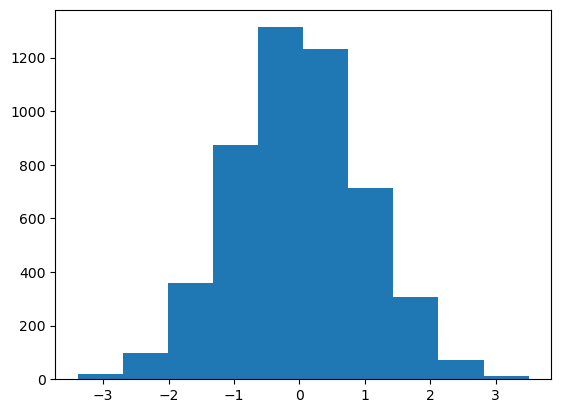

In [33]:
showHist(np.random.randn(5000))

In [34]:
a = np.random.normal(2, 3, (100, 20))

printary(a)

shape: (100, 20)
array: 
[[ 1.1737 -0.1372  1.4553 ...  5.7026  2.4229  2.7789]
 [ 2.3512  4.2401  4.7885 ...  0.9171  0.8025  1.9246]
 [ 3.1746  0.7352  0.6518 ... -4.7094 -0.6122  1.7279]
 ...
 [ 4.5716 -0.8192 -0.5151 ... -0.8601  4.7664 -2.7754]
 [ 5.0817 -1.2137  8.1517 ... -3.4974  5.6668  6.4446]
 [ 4.7669  3.6278  8.2961 ...  2.553   2.1643  3.5699]]
mean : 2.010, std: 2.962
------------------------------


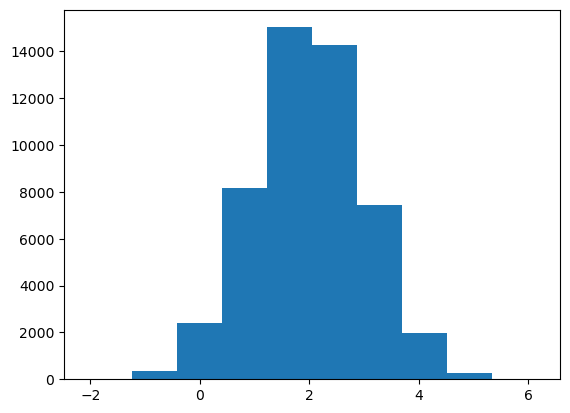

In [35]:
showHist(np.random.normal(2, 1, (50000,)))

In [36]:
a = np.random.permutation(10)
data = np.array([1,3,4,5,3,1,3])
b = np.random.permutation(data)
mylist = [[1,2,3], [4,5,6], [7,8,9], [3,2,1]]
c = np.random.permutation(mylist)

printary(a, b, c)

shape: (10,)
array: [9 2 7 8 6 3 1 4 5 0]
mean : 4.500, std: 2.872
------------------------------
shape: (7,)
array: [3 3 5 1 4 1 3]
mean : 2.857, std: 1.355
------------------------------
shape: (4, 3)
array: 
[[1 2 3]
 [3 2 1]
 [4 5 6]
 [7 8 9]]
mean : 4.250, std: 2.618
------------------------------


# 특정값으로 채워진 ndarray 생성

In [37]:
import numpy as np

In [38]:
def printary(*a):
    for x in a:
        print(f'{x.dtype}\n{x}')
        print("-" * 30)

In [39]:
mshape = (2, 3)

In [40]:
a = np.zeros(10, dtype=np.int32)
b = np.zeros(mshape)

printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
------------------------------
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [41]:
a = np.empty(10, dtype=np.int32)
b = np.empty(mshape)

printary(a, b)

int32
[          0 -1073741824           0           0           0  1073741824
           0  1074790400           0  1075314688]
------------------------------
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [42]:
a = np.ones(mshape)
b = np.full(mshape, 5)

printary(a, b)

float64
[[1. 1. 1.]
 [1. 1. 1.]]
------------------------------
int64
[[5 5 5]
 [5 5 5]]
------------------------------


In [43]:
a = np.eye(3)
b = np.eye(3, 5, 2)
c = np.eye(3, 5, -1)
d = np.identity(3)

printary(a, b, c, d)

float64
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
------------------------------
float64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
------------------------------
float64
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
------------------------------
float64
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
------------------------------


In [44]:
a = np.zeros_like([1,2,3])
b = np.empty_like([1,2,3])

printary(a, b)

int64
[0 0 0]
------------------------------
int64
[4611686018427387904 4616189618054758400 4618441417868443648]
------------------------------


In [45]:
a = np.ones_like([[1,2,3], [4,5,6]], dtype=np.float32)
b = np.full_like(np.arange(5), 10)

printary(a, b)

float32
[[1. 1. 1.]
 [1. 1. 1.]]
------------------------------
int64
[10 10 10 10 10]
------------------------------


# copy & view 객체

- ndarray 의 copy 객체 또는 view 객체의 특징
![nn](./images/numpy-03.png)

# The Array Interface (Arrary Protocol)

- 배열 인터페이스는 dictionary 구조로 필수 3개, 옵션 5개의 Key 가 있음
- 필수 : shape, typestr, version
- 옵션 : descr, data, strides, mask, offset
    + data : 저장 영역의 메모리 주소 정보, read-only flag
    + ndarray 의 저장공간 메모리 주소: `arr.__array_interface__['data'][0]`

![nn](./images/numpy-04.png)

In [46]:
def npinfo(n, a, x):
    print("name:     :", n)
    print("share:    :", np.may_share_memory(a, x))
    print("data:     :", x.tolist())
    print("ndim:     :", x.ndim)
    print("shape:    :", x.shape)
    print("dtype:    :", x.dtype)
    print("-" * 30)

In [47]:
a = np.array([[True, True], [False, False]], dtype=np.bool8)
b = a.copy()
b[0, 0] = False

npinfo("original", a, a)
npinfo("copy", a, b)

name:     : original
share:    : True
data:     : [[True, True], [False, False]]
ndim:     : 2
shape:    : (2, 2)
dtype:    : bool
------------------------------
name:     : copy
share:    : False
data:     : [[False, True], [False, False]]
ndim:     : 2
shape:    : (2, 2)
dtype:    : bool
------------------------------


In [48]:
a = np.array([[True, True], [False, False]], dtype=np.bool8)
b = a.view(dtype=np.bool8)
b[0, 0] = 0

npinfo("original", a, a)
npinfo("view", a, b)

name:     : original
share:    : True
data:     : [[False, True], [False, False]]
ndim:     : 2
shape:    : (2, 2)
dtype:    : bool
------------------------------
name:     : view
share:    : True
data:     : [[False, True], [False, False]]
ndim:     : 2
shape:    : (2, 2)
dtype:    : bool
------------------------------


# ndarray 변환 (reshape, flatten)

- `np.reshape(a, newshape: int or tuple or ints, order='C')`
- `arr.reshape(newshape: int or tuple or ints, order='C')`
    + order : C - C Language/행우선 처리, F - Fortran/열우선 처리
- reshape : View 반환
- flatten, astype : copy 반환

In [49]:
import sys

def npinfo(n, a, x):
    print("name:     :", n)
    print("share:    :", np.may_share_memory(a, x))
    print("data:     :", x.tolist())
    print("shape:    :", x.shape)
    print("dtype:    :", x.dtype)
    print("stride:   :", x.strides)
    print("addr:     :", x.__array_interface__['data'][0])
    print("sizeof    :", sys.getsizeof(x))
    print("-" * 30)

In [50]:
a = np.array([[1,2,3], [4,5,6]], dtype=np.int64)
b = a.reshape(1, -1)

npinfo("a.reshape(1, -1)", a, b)

name:     : a.reshape(1, -1)
share:    : True
data:     : [[1, 2, 3, 4, 5, 6]]
shape:    : (1, 6)
dtype:    : int64
stride:   : (48, 8)
addr:     : 105553133486176
sizeof    : 128
------------------------------


In [51]:
b = a.reshape(-1)

npinfo("a.reshape(-1)", a, b)

name:     : a.reshape(-1)
share:    : True
data:     : [1, 2, 3, 4, 5, 6]
shape:    : (6,)
dtype:    : int64
stride:   : (8,)
addr:     : 105553133486176
sizeof    : 112
------------------------------


In [52]:
b = a.reshape(-1, 1)

npinfo("a.reshape(-1, 1)", a, b)

name:     : a.reshape(-1, 1)
share:    : True
data:     : [[1], [2], [3], [4], [5], [6]]
shape:    : (6, 1)
dtype:    : int64
stride:   : (8, 8)
addr:     : 105553133486176
sizeof    : 128
------------------------------


In [53]:
b = a.reshape(-1, 1, order='F')

npinfo("a.reshape(-1, 1, order='F')", a, b)

name:     : a.reshape(-1, 1, order='F')
share:    : False
data:     : [[1], [4], [2], [5], [3], [6]]
shape:    : (6, 1)
dtype:    : int64
stride:   : (8, 48)
addr:     : 105553133536624
sizeof    : 128
------------------------------


In [54]:
b = a.flatten()

npinfo("a.flatten()", a, b)

name:     : a.flatten()
share:    : False
data:     : [1, 2, 3, 4, 5, 6]
shape:    : (6,)
dtype:    : int64
stride:   : (8,)
addr:     : 105553133486224
sizeof    : 160
------------------------------


In [55]:
a = np.array([[1,2,3], [4,5,6]], dtype=np.float64)
b = a.astype(np.int32)

npinfo("a.astype(np.int32)", a, b)

name:     : a.astype(np.int32)
share:    : False
data:     : [[1, 2, 3], [4, 5, 6]]
shape:    : (2, 3)
dtype:    : int32
stride:   : (12, 4)
addr:     : 105553148216160
sizeof    : 152
------------------------------


# ndarray 산술연산 - element-wise 방식의 이해

- element-wise 방식 연산 : 동일한 Shape 을 가진 배열의 연산 -> 같은 Index 에 위치한 요소를 연산
- broadcasting : element-wise 성립하지 않는 경우 두 배열의 크기를 동일하게 만들어 연산가능하도록 하는 것

In [56]:
a = np.array(range(1, 7))
b = np.array(range(7, 13))

print('a = ', a)
print('b = ', b)

print('a + b = ', a + b)
print('b - a = ', b - a)
print('a * b = ', a * b)
print('b / a = ', b / a)
print('b // a = ', b // a)
print('b % a = ', b % a)

print('a + 2 = ', a + 2)
print('b - 1 = ', b - 1)

a =  [1 2 3 4 5 6]
b =  [ 7  8  9 10 11 12]
a + b =  [ 8 10 12 14 16 18]
b - a =  [6 6 6 6 6 6]
a * b =  [ 7 16 27 40 55 72]
b / a =  [7.  4.  3.  2.5 2.2 2. ]
b // a =  [7 4 3 2 2 2]
b % a =  [0 0 0 2 1 0]
a + 2 =  [3 4 5 6 7 8]
b - 1 =  [ 6  7  8  9 10 11]


In [57]:
a = np.array(range(1, 7)).reshape(2, 3)
b = np.array(range(7, 13)).reshape(2, 3)

print(a)
print(b)
print(type(a.tolist()))
print('a = ', a.tolist())
print('b = ', b.tolist())

print('a + b = ', (a + b).tolist())
print('a * b = ', (a * b).tolist())

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
<class 'list'>
a =  [[1, 2, 3], [4, 5, 6]]
b =  [[7, 8, 9], [10, 11, 12]]
a + b =  [[8, 10, 12], [14, 16, 18]]
a * b =  [[7, 16, 27], [40, 55, 72]]


In [58]:
# element-wise 가 성립되지 않음 (broadcasting 안 됨)
a = np.array([1,3,5])
c = np.array([7,9])

print('a + c = ', a + c)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

# ndarray 산술연산 - broadcasting 의 이해

1. Scalar 값은 상대 배열의 shape 와 같은 shape, 동일 값으로 배열이 된다
2. 한 배열 shape 이 다른 배열 shape 의 부분 shape 이면 차원이 높은 shape 를 따른다
    + (4,2,3,1) 의 부분 shape 예시 : (2,3,1), (3,1), (1,)
3. 요소 갯수가 1인 차원에 한해서는 다른 배열의 동일 차원을 요수 수를 따른다
    + (5, 1) shape 을 가진 배열과 (1, 3) shape 을 가진 배열 -> (5, 3)과 (5, 3) 의 연산

In [59]:
import pprint as pp

def printary(m, *a):
    print(m)
    for x in a:
        print(x.shape, end=" : ")
        print(x.tolist())
    print("-" * 30)

In [60]:
a = np.array([[1,1,1], [1,1,1]])
b = np.array([[1,1,1], [2,2,2]])
c = np.array([[1], [2], [3]])
d = np.array([3,3,3])

print(a.shape, b.shape, c.shape, d.shape)

(2, 3) (2, 3) (3, 1) (3,)


In [61]:
printary("a+b", a, b, a+b)

a+b
(2, 3) : [[1, 1, 1], [1, 1, 1]]
(2, 3) : [[1, 1, 1], [2, 2, 2]]
(2, 3) : [[2, 2, 2], [3, 3, 3]]
------------------------------


In [62]:
# a는 (2, 3) shape 이므로  d (3, ) 은 부분 shape 임
printary("a+d", a, d, a+d)

a+d
(2, 3) : [[1, 1, 1], [1, 1, 1]]
(3,) : [3, 3, 3]
(2, 3) : [[4, 4, 4], [4, 4, 4]]
------------------------------


In [63]:
printary("b+4", b, b+4)

b+4
(2, 3) : [[1, 1, 1], [2, 2, 2]]
(2, 3) : [[5, 5, 5], [6, 6, 6]]
------------------------------


In [64]:
printary("c+d", c, d, c+d)

c+d
(3, 1) : [[1], [2], [3]]
(3,) : [3, 3, 3]
(3, 3) : [[4, 4, 4], [5, 5, 5], [6, 6, 6]]
------------------------------


# ndarray 비교 연산

- ==, !=, >, <, >=, <=: 결과 True / False
- element-wise 방식 (필요 시 broadcasting)

In [65]:
a = np.array([[1], [2], [3], [4], [5]])
b = np.array([1,2,3])
c = a + b
print(a.shape, b.shape, c.shape)

(5, 1) (3,) (5, 3)


In [66]:
print(a)
print(b)
print(c)

[[1]
 [2]
 [3]
 [4]
 [5]]
[1 2 3]
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]]


In [67]:
def printary(*a):
    for x in a:
        print(x.tolist(), end="\n")
        print("-" * 45)

In [68]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[1,3,5], [2,4,6]])
printary(a == b, b != a)

[[True, False, False], [False, False, True]]
---------------------------------------------
[[False, True, True], [True, True, False]]
---------------------------------------------


In [69]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[1,3,5], [2,4,6]])
printary(a > b, a < b)

[[False, False, False], [True, True, False]]
---------------------------------------------
[[False, True, True], [False, False, False]]
---------------------------------------------


In [70]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[1,3,5], [2,4,6]])
c = np.array([4,3,3])
printary(a >= c, b <= 3)

[[False, False, True], [True, True, True]]
---------------------------------------------
[[True, True, False], [True, False, False]]
---------------------------------------------


# ndarray indexing 이해

- indexing을 사용하여 배열에서 원하는 데이터를 참조/변경하다.
- 배열 이름 뒤에 [] 를 사용하여 참조/변경할 데이터를 표기한다.
- 결과는 원본의 View 이며, View 에 대입을 통해 데이터 변경이 가능함
- ndim >= 2 인 경우 [] 내부에 콤마(,)를 사용하여 차원 (축, axis, axes) 을 구분함
- 콤마(,) 사이에는 참조/변경하기 원하는 데이터에 대한 표기(indexer)가 포함되어야 함
- axis=0 을 제외한 차원에 대한 표기 생략 가능, 생략은 "모두 선택"의 의미를 갖음

In [71]:
import numpy as np

In [72]:
a = np.arange(9).reshape(3,3)

print(a)
print(a[1])
print(a[0,2])
print(a[0][2])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[3 4 5]
2
2


In [73]:
a[0,2] = 100
print(a, a.dtype)

a[1][2] = 200
print(a)

a[2] = [10, '20', 3.14]
print(a)

[[  0   1 100]
 [  3   4   5]
 [  6   7   8]] int64
[[  0   1 100]
 [  3   4 200]
 [  6   7   8]]
[[  0   1 100]
 [  3   4 200]
 [ 10  20   3]]


# Indexer 의 종류

- single element index
- slicing & stride index
- index arrays : 배열의 형태 (list or ndarray)
- boolean index : True / False 로 구성된 배열의 형태, 단 기존 배열과 구조가 동일하여야 함
- structural indexing tools
    + `...` : 전체
    + `np.newaxis` : 차원을 증가

In [74]:
a = np.arange(5)

print(a[1], type(a[1]))
print(a[[1]], type(a[[1]]))                   # index array
print(a[1:4:2])
print(a[[0,1,-1]])                            # index array
print(a[[True, False, False, True, False]])   # boolean index
print(a[..., np.newaxis])                     # structural indexing tools

1 <class 'numpy.int64'>
[1] <class 'numpy.ndarray'>
[1 3]
[0 1 4]
[0 3]
[[0]
 [1]
 [2]
 [3]
 [4]]


## list와 ndarray의 indexing 차이점

- ndarray의 indexing 의 반환 값은 원본을 참조하는 view 임
- 새로운 ndarray로 처리하려면 copy 함수나 method 를 참조하여야 함

In [75]:
x = [[1,2,3], [6,7,8]]
z = x[:]
z[0] = [10, 20, 30]
z[1][0] = 100
# 왜 z[1][0] 의 값을 변경 시 x 도 변경되는가?
# python 의 list 는 memory address 를 가지므로 z = x[:] 는 [id(x[0])] [id(x[1])] 을 복사한 것임
# 따라서 행이 아닌 해당 값은 메모리 주소를 참조하여 변경되는 것

print(x, z, sep='\n')
print(id(x[1]), id(z[1]))
print("-" * 25)

[[1, 2, 3], [100, 7, 8]]
[[10, 20, 30], [100, 7, 8]]
140512678520256 140512678520256
-------------------------


In [76]:
x = [[1,2,3], [6,7,8]]
z = x
z[0] = [10, 20, 30]

print(x, z, sep='\n')
print(id(x[1]), id(z[1]))
print("-" * 25)

[[10, 20, 30], [6, 7, 8]]
[[10, 20, 30], [6, 7, 8]]
140513380621888 140513380621888
-------------------------


In [77]:
x = np.array([[1,2,3], [6,7,8]])
z = x[:]
z[0] = [10, 20, 30]

print(x, z, sep='\n')
print(np.may_share_memory(x, z))
print(x.__array_interface__['data'][0], z.__array_interface__['data'][0], x.dtype)
print("-" * 25)

[[10 20 30]
 [ 6  7  8]]
[[10 20 30]
 [ 6  7  8]]
True
105553133486128 105553133486128 int64
-------------------------


In [78]:
x = np.array([[1,2,3], [6,7,8]], dtype=np.int32)
z = x[1:]
z[0] = [10, 20, 30]

print(x, z, sep='\n')
print(np.may_share_memory(x, z))
print(x.__array_interface__['data'][0], z.__array_interface__['data'][0], x.dtype)
print("-" * 25)

[[ 1  2  3]
 [10 20 30]]
[[10 20 30]]
True
105553148216352 105553148216364 int32
-------------------------


## single element index 사용

- single element index의 사용이 <u>1개 증가할 때 마다 배열의 차원(ndim)은 1씩 감소한다</u>
- axis=0 부터 뒤쪽으로 콤마(,)를 기준으로 index 를 나열함
- index 표기되지 않는 차원은 "모두 선택"
- 예) 2차원 배열에서 a[n] 은 n번째 전체를 반환함
- indexing 을 연속으로 진행한 것과 콤마(,) 나열은 같은 결과
- 예) a[n][m] == a[n,m]

In [79]:
a = np.arange(12).reshape(2,3,2)

print(a.tolist())
print(a[0].tolist())
print(a[0,0].tolist())
print(a[0,0,0])

print(a.shape)

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[0, 1], [2, 3], [4, 5]]
[0, 1]
0
(2, 3, 2)


## slice & stride

- arr[n:m:k]
- n 부터 m-1 까지, k씩 건너 뛴 위치 요소로 구성된 배열 반환
- n, m, k 는 생략 가능하며, 생략 시 n=0, m=len(arr), k=1
- slice & stride 의 사용이 증가해도 <u>배열의 차원(ndim)은 변화 없음</u>
- axis=0 부터 뒤쪽으로 콤마(,)를 기준으로 indexer 를 나열함
- indexer 가 표기되지 않은 axis 는 "모두 선택"
- `:` : 특정 axis 에 대해 모든 범위를 의미함
- `...` : 나머지 모든 차원에 대해 모든 범위를 의미함
    + a[..., 1] 에서 a의 shape 가 (2,3,2) 인 경우
    + ... 은 면, 행 전체(axis 0과 1)를 의미하고 1 은 열(axis 2)에 대한 index 를 의미

In [80]:
a = np.arange(12).reshape(2,3,2)

print(a)

print(a.tolist())
print(a[1:].tolist())
print(a[..., ::-1].tolist())
print(a[:, ::-1].tolist())

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[[6, 7], [8, 9], [10, 11]]]
[[[1, 0], [3, 2], [5, 4]], [[7, 6], [9, 8], [11, 10]]]
[[[4, 5], [2, 3], [0, 1]], [[10, 11], [8, 9], [6, 7]]]


## index arrays

- index array는 dtype=int 인 배열로, index 번호를 element 로 갖는 배열임
- <u>index array의 형태에 따라 반환되는 배열의 ndim 이 원본과 동일하거나, 증가, 감소될 수 있음</u>

### 1차원

- index array 에 포함된 index 항목들로 구성된 배열 반환
- a[ [0, 2, 4] ] 는 a 에서 0, 2, 4번 index 항목으로 구성된 배열 반환
- index array 사용 시 주의 사항
    + index 중복 사용 가능
    + 2차원 이상의 index array 는 ndarray 를 사용 ([[[ -> 사용 불가능)

In [81]:
import numpy as np

a = np.arange(5)
print(a)
print("-" * 25)

print(a[0], a[[0]], type(a[[0]]))
print(a[[-1, 0, 1, 0]])
print(a[[[0,2,4], [1,3,3]]])
print(a[np.array([[0,2,4], [1,3,3]])])

[0 1 2 3 4]
-------------------------
0 [0] <class 'numpy.ndarray'>
[4 0 1 0]
[[0 2 4]
 [1 3 3]]
[[0 2 4]
 [1 3 3]]


### 2차원

- idx_a1, idx_a2의 같은 위치 항들이 묶여 위치 정보가 됨
- 다차원이 되면 콤마(,)로 나열하며, 동일 길이로 구성되어야 함
- a가 2D array 인 경우
    + a[ [0,0,1], [2,3,1] ] 은 [0.2], [0,3], [1,1]항을 배열로 반환
    + a[ [0,1],0 ] : a[ [0,0], [1,0] ] (broadcasting) [0.0], [1,0] 항 반환

In [82]:
a = np.arange(12).reshape(3, -1)

print(a)

print(a[[0,0,1], [2,3,1]])
print(a[[0,1], 0])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[2 3 5]
[0 4]


In [83]:
a = np.arange(12).reshape(2,3,-1)
print(a)

# [0, 3, 8, 10]
print(a[ [0,0,1,1],[0,1,1,2],[0,1,0,0] ])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  3  8 10]


In [84]:
a = np.arange(12).reshape(4,-1)
print(a, a.shape)

# [ [1,3], [8,9] ]
#
# [0,1],[1,0],[2,2],[3,0] - single element index
#
# [0,1,2,3],[1,0,2,0] - array index [row][column]
#
# [[0,1],[2,3]],[[1,0],[2,0]] - + dimension for array index 
print(a[[[0,1],[2,3]],[[1,0],[2,0]]])
print(a[np.array([[0,1],[2,3]]), np.array([[1,0],[2,0]])])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] (4, 3)
[[1 3]
 [8 9]]
[[1 3]
 [8 9]]


## boolean array 의 사용

- boolean array 는 원본 배열과 동일한 shape 의 dtype=bool 인 배열
- 원본에서 boolean array 가 True 인 위치의 것만을 대상으로 배열이 반환됨
- boolean array 는 ndarray, list 등으로 작성하거나, 연산의 결과일 수 있음
- 주로 결과가 True/False 인 비교연산식을 사용하여 작성함
- 복잡한 조건은 `np.logical_and()`, `np.logical_or()`, `np.logical_not()` 활용
- boolean array 와 &, |, ~ 연산자를 사용하여 조건 작성 가능 (괄호 사용 중요)

In [85]:
a = np.arange(1, 7)
b = np.array([True, False, True, True, False, True])

print(a)
print(a[b])
print(a%2)
print(a%2 == 0)
print(a[a%2 == 0])
print(a[a%2])

[1 2 3 4 5 6]
[1 3 4 6]
[1 0 1 0 1 0]
[False  True False  True False  True]
[2 4 6]
[2 1 2 1 2 1]


In [86]:
def printary(w1, w2, ary, *, sep='|'):
    for x in ary.split(sep):
        x = x.strip()
        t = eval(x)
        print(f'%-{w1}s %-{w2}s %s' % (x, t.shape, t.tolist()))
    print("-" * 30)

In [87]:
a = np.random.permutation(10)
printary(10, 7, "a | a[a%2==0]")
printary(10, 7, "a | a[a>=4]")

a          (10,)   [7, 9, 4, 8, 1, 6, 0, 5, 3, 2]
a[a%2==0]  (5,)    [4, 8, 6, 0, 2]
------------------------------
a          (10,)   [7, 9, 4, 8, 1, 6, 0, 5, 3, 2]
a[a>=4]    (6,)    [7, 9, 4, 8, 6, 5]
------------------------------


In [88]:
printary(32, 7, "a[np.logical_or(a%3==0, a%2==0)]")
printary(32, 7, "a[(a%3==0) | (a%2==0)]", sep='+')

a[np.logical_or(a%3==0, a%2==0)] (7,)    [9, 4, 8, 6, 0, 3, 2]
------------------------------
a[(a%3==0) | (a%2==0)]           (7,)    [9, 4, 8, 6, 0, 3, 2]
------------------------------


In [89]:
printary(32, 7, "a[np.logical_and(a>=6, a<=9)]")
printary(32, 7, "a[(a>=6) & (a<=9)]", sep='+')

a[np.logical_and(a>=6, a<=9)]    (4,)    [7, 9, 8, 6]
------------------------------
a[(a>=6) & (a<=9)]               (4,)    [7, 9, 8, 6]
------------------------------


In [90]:
printary(32, 7, "a[np.logical_not(a%3==0)]")
printary(32, 7, "a[~(a%3==0)]", sep='+')

a[np.logical_not(a%3==0)]        (6,)    [7, 4, 8, 1, 5, 2]
------------------------------
a[~(a%3==0)]                     (6,)    [7, 4, 8, 1, 5, 2]
------------------------------


In [91]:
print(a)
a[a%3==0] = -1
print(a)

[7 9 4 8 1 6 0 5 3 2]
[ 7 -1  4  8  1 -1 -1  5 -1  2]


## combine index & slice

- single element index (0, -1 등) : 사용할수록 차원(ndim)이 감소
- slice & stride : 사용하더라도 차원(ndim) 변화 없음
- array index : 사용 시 차원(ndim) 유지 또는 확대/감소

In [92]:
b = np.arange(1, 12, 2).reshape(3, -1)
print(b)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [93]:
b[:, [-1]], b[:, [-1]].tolist()
# print(b[:, [-1]].shape)

(array([[ 3],
        [ 7],
        [11]]),
 [[3], [7], [11]])

In [94]:
b[:, -1], b[:, -1].tolist()
# print(b[:, -1].shape)

(array([ 3,  7, 11]), [3, 7, 11])

In [95]:
c = np.arange(12).reshape(2, 3, 2)
print(c, c.shape)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]] (2, 3, 2)


In [96]:
# slice index: 차원 감소 없음, single element index: 차원 감소
c[:, -1], c[:, -1].shape

(array([[ 4,  5],
        [10, 11]]),
 (2, 2))

In [97]:
# slice index: 차원 감소 없음, single element index: 차원 감소
c[..., -1], c[..., -1].shape

(array([[ 1,  3,  5],
        [ 7,  9, 11]]),
 (2, 3))

In [98]:
# slice index: 차원 감소 없음
c[..., :1], c[..., :1].shape

(array([[[ 0],
         [ 2],
         [ 4]],
 
        [[ 6],
         [ 8],
         [10]]]),
 (2, 3, 1))

In [99]:
# array index: 차원 감소 없음 또는 증가, single element index: 차원 감소
c[[0], 1],c[[0], 1].shape

(array([[2, 3]]), (1, 2))

In [100]:
# array index: 차원 감소 없음 또는 증가, slice index: 차원 감소 없음
c[[0], 1:], c[[0], 1:].shape

(array([[[2, 3],
         [4, 5]]]),
 (1, 2, 2))

## indexing 활용

In [101]:
aN3 = np.array([[0,-1,4], [-2,3,2], [1,2,-1], [-4,3,-2]])
print(aN3)

[[ 0 -1  4]
 [-2  3  2]
 [ 1  2 -1]
 [-4  3 -2]]


In [102]:
aN3[:, [1,0,2]]

array([[-1,  0,  4],
       [ 3, -2,  2],
       [ 2,  1, -1],
       [ 3, -4, -2]])

In [103]:
aN3[aN3[:,0] < 0]

array([[-2,  3,  2],
       [-4,  3, -2]])

In [104]:
aN3[aN3[:,0] < 0, 1:]

array([[ 3,  2],
       [ 3, -2]])

In [105]:
a3N = np.array([[x] * 3 for x in range(3)])
print(aN3)

[[ 0 -1  4]
 [-2  3  2]
 [ 1  2 -1]
 [-4  3 -2]]


In [106]:
a3N[[0,2,1], :]

array([[0, 0, 0],
       [2, 2, 2],
       [1, 1, 1]])

In [107]:
aN = np.arange(3)
print(aN)

[0 1 2]


In [108]:
aN.reshape(-1,1)

array([[0],
       [1],
       [2]])

In [109]:
aN[:, None]

array([[0],
       [1],
       [2]])

In [110]:
aN[:, np.newaxis]

array([[0],
       [1],
       [2]])

# ndarray 유용한 필수 함수

## 정수값과 관련있는 난수 발생
- `np.random.seed(정수)`
- 정수가 값으면 항상 같은 난수가 발생됨
- `np.random.randint(start, stop, size=shape)`
- start ~ stop-1 까지의 정수로 구성된 size 모양의 난수 배열 반환
- 1차원인 경우 size 에 정수 사용 가능

In [111]:
import numpy as np

# np.random.seed(101)
x = np.random.randint(1, 5, size=(3,4))
print(x)

[[4 2 1 4]
 [3 2 1 4]
 [3 1 3 1]]


## ndarray 객체 순서 무작위 변경
- `np.random.shuffle(ndarray 객체)`
- None 반환
- 다차원 ndarray 의 경우 가장 상위 차원만이 shuffle 됨

In [112]:
a = np.arange(10)
# a = np.array([[1,2,3], [4,5,6], [3,4,5], [7,1,5]])
np.random.shuffle(a)
print(a)

b = np.random.permutation(10)
print(b)

[7 2 1 4 8 0 6 9 3 5]
[0 6 2 7 8 5 1 9 3 4]


## 중복 값 제거된 배열 생성
- `np.unique(a, return_counts=False)`
- a 가 다차원 배열인 경우 1차원으로 변경되어 작업됨
- return_counts 인수가 True 로 설정하면 각 데이터 개수의 ndarray 배열도 생성하여 반환
    + (중복 값 제거된 배열, 각 데이터 개수의 배열) tuple 로 반환

In [113]:
np.random.seed(1000)

a = np.random.randint(1, 100000, size= 200000)
b = a.reshape(1000, -1)

In [114]:
x1 = np.unique(a)
x2 = np.unique(b)
print(f'size={len(x1)}', x1, sep="\n")
print(f'size={len(x2)}', x2, sep="\n")

size=86439
[    1     2     3 ... 99996 99998 99999]
size=86439
[    1     2     3 ... 99996 99998 99999]


In [115]:
c = [ [1,2,3], [1,2,3], [1,3,5] ]
d = [ [1,2,3], [1,2,3], [1,3] ]

x3 = np.unique(c)
x4 = np.unique(d)

print(x3, x4, sep="\n")

[1 2 3 5]
[list([1, 2, 3]) list([1, 3])]


/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [116]:
x5, rcount = np.unique(c, return_counts=True)
print(x5, rcount, sep="\n")

[1 2 3 5]
[3 2 3 1]


## 배열에서 가장 큰/작은 요소의 index 번호
- `np.argmax(a)`
- `np.argmin(a)`
- index 번호는 0번부터 시작
- 2차원 이상인 경우 1차원으로 변경하여 작업 진행됨

In [117]:
np.random.seed(1234)

x1 = np.random.randint(100, size=12)
x2 = x1.reshape(2,3,2)

print(x1, x2, sep="\n")

[47 83 38 53 76 24 15 49 23 26 30 43]
[[[47 83]
  [38 53]
  [76 24]]

 [[15 49]
  [23 26]
  [30 43]]]


In [118]:
print(f'x1 - argmax : {np.argmax(x1)}, argmin : {np.argmin(x1)}')
print(f'x2 - argmax : {np.argmax(x2)}, argmin : {np.argmin(x2)}')

x1 - argmax : 1, argmin : 6
x2 - argmax : 1, argmin : 6


## min보다 작은 값을 min으로 max보다 큰 값을 max으로 변경
- `np.clip(a, min, max, out=None)`
- 새로운 배열 반환, out에 a 와 동일한 크기의 배열 지정 가능
- out 사용 시, out에 지정된 배열로도 결과가 반환됨 (배열 내용 변경)

In [119]:
np.random.seed(150)

x = np.random.randint(30, 60, 10)
y1 = np.clip(x, 35, 55)

print(x, y1, sep="\n")

[34 56 57 55 46 48 34 58 44 35]
[35 55 55 55 46 48 35 55 44 35]


In [120]:
y2 = np.clip(x, 35, 55, out=x)

print(x, y2, sep="\n")

[35 55 55 55 46 48 35 55 44 35]
[35 55 55 55 46 48 35 55 44 35]


## 조건에 따른 데이터 선택
- `np.where(조건, [,c,d])`
- 조건: 참, 거짓(=0, False, None)으로 이루어진 배열 또는 스칼라
- 조건 배열이 참일 떄 c, 거짓일 떄 d 를 취한 배열 반환 (c, d 는 스칼라 가능)
- c, d 생략 시 조건이 참인 것에 대한 index 배열 (ndarray) tuple 반환 (ndarry, ndarry, ...) 의 형태
- 조건 배열의 ndim == len(tuple)
- 복잡한 조건은 ~, &, | 및 `np.logical_not()`, `np.logical_and()`, `np.logical_or()` 사용

In [121]:
a = np.array([4, 8, 2, 5])
b = np.array([3, 9, 1, 7])

print(np.where(True, a, b))
print(np.where(False, a, b))

[4 8 2 5]
[3 9 1 7]


In [122]:
print(np.where([[True, False],[False, True]], 
               [[3,4],[5,7]], 
               [[1,2],[9,2]]))

[[3 2]
 [9 7]]


In [123]:
# True 의 위치를 가진 array의 tuple 반환
print(np.where([[True, False],[False, True]]))

(array([0, 1]), array([0, 1]))


## 통계값 함수들
- axis 를 0 또는 1로 지정할 경우
- axis=0 은 index 방향으로 연산, axis=1은 column 방향으로 연산한 값을 배열로 반환함
- ndarray 에서 동일 동작을 하는 동일 이름의 method 있음 (`arr.mean()`)
- `np.sum(a, axis=None)` : 배열 내 모든 원소의 핪을 스칼라 값으로 반환
- `np.mean(a, axis=None)` : 배열 내 모든 원소의 평균을 스칼라 값으로 반환
- `np.median(a, axis=None)` : 중앙값
- `np.std(a, axis=None)` : 배열 내 모든 원소의 표준편차를 스칼라 값으로 반환
- `np.var(a, axis=None)` : 분산
- `np.any(a, axis=None)` : 배열의 원소들 중 참이 하나라도 있으면 True 반환
- `np.all(a, axis=None)` : 배열의 모든 원소가 참인 경우 True 반환

In [124]:
def printary(*a):
    for x in a:
        print(x)
        print("-" * 30)

In [125]:
a = np.arange(1,7).reshape((2,3))

b = a.sum()
c = a.sum(axis=0)
d = a.sum(axis=1)

printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
------------------------------
21
------------------------------
[5 7 9]
------------------------------
[ 6 15]
------------------------------


In [126]:
a = np.arange(1,7).reshape((2,3))

b = a.mean()
c = a.mean(axis=0)
d = a.mean(axis=1)

printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
------------------------------
3.5
------------------------------
[2.5 3.5 4.5]
------------------------------
[2. 5.]
------------------------------


In [127]:
a = np.arange(1,7).reshape((2,3))

b = a.std()
c = a.std(axis=0)
d = a.std(axis=1)

printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
------------------------------
1.707825127659933
------------------------------
[1.5 1.5 1.5]
------------------------------
[0.8165 0.8165]
------------------------------


In [128]:
a = np.arange(6).reshape((2,3))
printary(a.any(), a.all())

True
------------------------------
False
------------------------------


# ndarray 파일 입출력

In [129]:
def printary(*a):
    for x in a:
        print(x)
        print("-" * 30)

In [130]:
import numpy as np

a1 = np.arange(20000)
a2 = np.random.randint(1, 10000, size=(5,1000))
a3 = np.ones((1,2,1000), dtype=np.int32)
#path = "*\\"
path = "./"

np.save(path + "a1.npy", a1)
r = np.load(path + "a1.npy")

print(r)

[    0     1     2 ... 19997 19998 19999]


In [131]:
np.savez(path + "an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path + "an.npz")

printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
------------------------------
[[1944 2653 7018 ... 2546 1037 6066]
 [2094 2909 6299 ... 5660 5529 9946]
 [2867 4540 7988 ... 9776 2740 3436]
 [8224 8491 2871 ... 9105 2881 6857]
 [7991 5955 1885 ...  814 1468 2903]]
------------------------------
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [132]:
np.savez_compressed(path + "c_an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path + "c_an.npz")

printary(r['A1'], r['A2'], r['A3'])
print(type(r))

[    0     1     2 ... 19997 19998 19999]
------------------------------
[[1944 2653 7018 ... 2546 1037 6066]
 [2094 2909 6299 ... 5660 5529 9946]
 [2867 4540 7988 ... 9776 2740 3436]
 [8224 8491 2871 ... 9105 2881 6857]
 [7991 5955 1885 ...  814 1468 2903]]
------------------------------
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------
<class 'numpy.lib.npyio.NpzFile'>


In [133]:
np.savetxt(path + "a1.txt", a1, fmt="%d")
r = np.loadtxt(path + "a1.txt", dtype=np.int32)

printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


# numpy의 NaN, INF 처리

In [134]:
print(np.nan, type(np.nan))
print(np.inf, type(np.inf))

nan <class 'float'>
inf <class 'float'>


In [135]:
a = np.array([np.nan, 1, 0, -1, np.inf], dtype=np.float16)

print(a)
print(np.isnan(np.nan), np.isnan(a))
print(np.isinf(np.inf), np.isinf(a))

# nan 은 값이 없는 것이므로 비교 연산은 불가하며 is 연산으로 처리하여야 함
x = np.nan
print(x == np.nan)
print(x is np.nan)

[nan  1.  0. -1. inf]
True [ True False False False False]
True [False False False False  True]
False
True


In [136]:
def printary(*a):
    for x in a:
        print(x)
        print("-" * 30)

In [137]:
a = np.array([1, np.nan, np.nan, 2, np.inf], dtype=np.float16)
b = np.array([1, np.inf, 1, 1, np.nan], dtype=np.float16)

printary(a, b, a+b, a+2)

[ 1. nan nan  2. inf]
------------------------------
[ 1. inf  1.  1. nan]
------------------------------
[ 2. nan nan  3. nan]
------------------------------
[ 3. nan nan  4. inf]
------------------------------


In [138]:
printary(a, a.sum(), a.cumsum(), a.all())

[ 1. nan nan  2. inf]
------------------------------
nan
------------------------------
[ 1. nan nan nan nan]
------------------------------
True
------------------------------


In [139]:
printary(np.sqrt(a), np.unique(a), np.unique(b))

[1.      nan   nan 1.414   inf]
------------------------------
[ 1.  2. inf nan]
------------------------------
[ 1. inf nan]
------------------------------


# matmul, dot 연산

### dot, matmul 연산은 두 배열의 행과 열에 대한 곱의 합을 구하는 함수이다
- a는 앞, b는 뒤에 위치한 배열일 떄
- a의 axis-1 과 b의 axis-2 의 각 요소 곱의 합을 구하는 것
- a의 axis-1 과 b의 axis-2 의 요소 수가 같아야 함
- b가 1-D (1차원)인 경우 b의 axis-1의 요소가 곱의 대상이 됨

![nn](./images/numpy-05.png)

In [141]:
import numpy as np

a = np.array([[1,1,1],[2,2,2]])
b = np.array([[1,2],[3,4],[5,6]])

print(a.shape, b.shape)

(2, 3) (3, 2)


In [143]:
c = np.matmul(a, b)
d = a.dot(b)

print(c, d, sep="\n")

[[ 9 12]
 [18 24]]
[[ 9 12]
 [18 24]]


## matmul, dot 의 같은 동작

- a, b 모두 1-D 또는 2-D
- a 는 1-D, b 는 N-D 또는 a 는 N-D, b 는 1-D
- 이 경우 matmul 함소 또는 @ 연산자로 사용하는 것이 권장됨

- `np.matmul(a, b), a @ b`
    + https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
    + a 와 b 의 'Matrix Product' 를 구하여 반환 / a, b: <u>스칼라 사용할 수 없음</u>
    + a 가 ndarry 인 경우 @ 연산자를 사용할 수 있음
    
- `np.dot(a, b), a.dot(b)`
    + https://numpy.org/doc/stable/reference/generated/numpy.dot.html
    + a 와 b 의 'Dot(Inner) Product' 를 구하여 반환 / a, b : <u>스칼라 사용할 수 있음</u>
    + 많은 경우 matmul 과 동일한 동작

In [146]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])

c = np.matmul(a, b)
d = np.dot(a, b)

print(c, d, sep='\n')
print(c.shape, d.shape)

14
14
() ()


In [148]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([[1,2],[3,4]])

c = np.matmul(a, b)
d = np.dot(a, b)
e = a @ b

print(a.shape, b.shape, c.shape)
print(c, d, e, sep='\n')

(3, 2) (2, 2) (3, 2)
[[ 7 10]
 [15 22]
 [23 34]]
[[ 7 10]
 [15 22]
 [23 34]]
[[ 7 10]
 [15 22]
 [23 34]]


In [150]:
a = np.array([1,2,3])
b = np.array([[[1,2],[2,3],[3,4]]])

c = np.matmul(a, b)
d = np.dot(a, b)
e = a @ b

print(a.shape, b.shape, c.shape)
print(c, d, e, sep='\n')

(3,) (1, 3, 2) (1, 2)
[[14 20]]
[[14 20]]
[[14 20]]


In [151]:
a = np.array([1,2,3])
b = np.array([[1,2],[2,3],[3,4]])

c = np.matmul(a, b)
d = np.dot(a, b)
e = a @ b

print(a.shape, b.shape, c.shape)
print(c, d, e, sep='\n')

(3,) (3, 2) (2,)
[14 20]
[14 20]
[14 20]


In [152]:
a = np.array([[[1,2,3], [4,5,6]], [[1,1,1],[2,2,2]]])
b = np.array([1,2,3])

c = np.matmul(a, b)
d = np.dot(a, b)
e = a @ b

print(a.shape, b.shape, c.shape)
print(c, d, e, sep='\n')

(2, 2, 3) (3,) (2, 2)
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]


## 다음 두 배열의 matmul, dot 연산의 결과 shape 을 예측하여 적어보자!
- (2,2,3) (3,) -> (2,2)
- (2,3) (3,2) -> (2,2)
- (2,3) (3,) -> (2,)
- (3,) (3,1) -> (1,)
- dot만 가능 : (3,2) 2(scalar) -> 

In [162]:
a = np.array([[[1,2,3], [4,5,6]], [[1,1,1],[2,2,2]]])
b = np.array([1,2,3])

c = np.matmul(a, b)
d = np.dot(a, b)

print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(2, 2, 3) (3,) (2, 2)
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]


In [163]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[1,2],[3,4],[5,6]])

c = np.matmul(a, b)
d = np.dot(a, b)

print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(2, 3) (3, 2) (2, 2)
[[22 28]
 [49 64]]
[[22 28]
 [49 64]]


In [164]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([1,2,3])

c = np.matmul(a, b)
d = np.dot(a, b)

print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(2, 3) (3,) (2,)
[14 32]
[14 32]


In [165]:
a = np.array([1,2,3])
b = np.array([[1],[2],[3]])

c = np.matmul(a, b)
d = np.dot(a, b)

print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(3,) (3, 1) (1,)
[14]
[14]


## matmul, dot의 다른 동작

- a, b 모두 1-D / a, b 모두 2-D / a 는 1-D, b 는 N-D / a 는 N-D, b 는 1-D : 동일 동작
- 위의 경우가 아니라면 결과 배열의 shape 이 다를 수 있음
    + 새로운 배열에서 계산한 값이 들어가는 위치가 다름
- a, b 중 한 쪽이 Scalar 
    + dot 은 가능, matmul 은 불가능

### 3차원 이상을 포함한 배열의 matmul 연산

- 대응하는 열/행을 제외한 나머지 배열에서의 원래 index 위치를 유지한다
    + (**2**,**2**,3) (**2**,3,**3**) -> (**2**,**2**,**3**)
    + (**2**,**2**,3) (**3**,3,**3**) -> 불능
    + (**2**,3) (**3**,3,**2**) -> (**3**,**2**,**2**)    
- 뒤 배열은 앞 배열과 '행'전까지의 요소 갯수가 같아야 한다. (앞 배열의 차원이 더 높거나 같은 경우)
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다

### 3차원 이상을 포함한 배열의 dot 연산

- 대응하는 열/행을 삭제하고 앞 배열에서 뒤 배열 쪽으로 남은 index를 나열한다
    + (**2**,**2**,3) (**2**,3,**3**) -> (**2**,**2**,**2**,**3**)
    + (**2**,**2**,3) (**3**,3,**3**) -> (2,2,3,3)
    + (**2**,3) (**3**,3,**2**) -> (**2**,**3**,**2**)
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다

In [170]:
a23 = np.array([[1,1,1],
                [2,2,2]])
a332 = np.array([[[1,2],
                  [3,4],
                  [5,6]],
                 [[1,1],
                  [1,2],
                  [2,2]],
                 [[1,2],
                  [1,3],
                  [1,4]]])
r = a23[1, :]
c = a332[0, :, 0]
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a23, a332)
x2 = np.dot(a23, a332)
print(a23.shape, a332.shape, x1.shape, x2.shape)
print(x1, x2, sep='\n\n\n')

[2 2 2]
[1 3 5]
18
------------------------------
(2, 3) (3, 3, 2) (3, 2, 2) (2, 3, 2)
[[[ 9 12]
  [18 24]]

 [[ 4  5]
  [ 8 10]]

 [[ 3  9]
  [ 6 18]]]


[[[ 9 12]
  [ 4  5]
  [ 3  9]]

 [[18 24]
  [ 8 10]
  [ 6 18]]]


In [171]:
a223 = np.array([[[1,1,1],
                  [2,3,4]],
                 [[3,2,1],
                  [1,2,3]]])
a233 = np.array([[[1,2,1],
                  [3,4,2],
                  [5,7,6]],
                 [[1,1,1],
                  [1,2,2],
                  [2,2,2]]])
r = a223[0, 1, :]
c = a233[0, :, 0]
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a223, a233)
x2 = np.dot(a223, a233)
print(a223.shape, a233.shape, x1.shape, x2.shape)
print(x1, x2, sep='\n\n\n')

[2 3 4]
[1 3 5]
31
------------------------------
(2, 2, 3) (2, 3, 3) (2, 2, 3) (2, 2, 2, 3)
[[[ 9 13  9]
  [31 44 32]]

 [[ 7  9  9]
  [ 9 11 11]]]


[[[[ 9 13  9]
   [ 4  5  5]]

  [[31 44 32]
   [13 16 16]]]


 [[[14 21 13]
   [ 7  9  9]]

  [[22 31 23]
   [ 9 11 11]]]]
